In [25]:
import os

import pandas
import seaborn
import numpy

In [14]:
column_namer = {
    'Score': 'score',
    'Score in timeframe':  'score_in_timeframe',
    'Title': 'title',
    'Journal': 'journal',
    'URL': 'url',
    'Most recent mention': 'most_recent_mention',
    'DOI': 'doi',
    'PMID': 'pmid',
    'ArXiv ID': 'arxiv_id',
    'Reddit threads': 'reddit_threads',
    'Bloggers': 'bloggers',
    'Tweeters': 'tweeters',
    'Google+ authors': 'google_plus_authors',
    'F1000 reviews': 'f1000_reviews',
    'Pinterest posts': 'pinterest_posts',
    'News outlets': 'news_outlets',
    'Q&A site users': 'qna_site_users',
    'Facebook walls': 'facebook_walls',
    'Weibo users': 'weibo_users',
    'Peer review sites': 'peer_review_sites',
    'Policy documents': 'policy_documents',
    'Mendeley readers': 'mendeley_readers',
    'CiteULike readers': 'citeulike_readers',
    'Score percentile (journal)': 'score_percentile_journal',
    'Score percentile (all)': 'score_percentile',
    'Score percentiles (journal, same age)': 'score_percentile_journal_same_age',
    'Score percentile (all, same age)': 'score_percentile_same_age',
    'Small image': 'small_image',
    'Medium image': 'medium_image',
    'Journal ISSNs': 'journal_issns',
    'Altmetric ID': 'altid'
}

path = os.path.join('download', 'all-mentioned-articles_2015-04-24.csv')
altmetric_df = pandas.read_csv(path)
altmetric_df.rename(columns=column_namer, inplace=True)
altmetric_df.set_index('altid', drop=False, inplace=True)
len(altmetric_df)

50000

In [15]:
altmetric_df[-1:]

,score,score_in_timeframe,title,journal,url,most_recent_mention,doi,pmid,arxiv_id,reddit_threads,...,mendeley_readers,citeulike_readers,score_percentile_journal,score_percentile,score_percentile_journal_same_age,score_percentile_same_age,small_image,medium_image,journal_issns,altid
altid,,,,,,,,,,,,,,,,,,,,,
2940143,50,50,Electricity-Free Amplification and Detection f...,PLoS ONE,http://dx.doi.org/10.1371/journal.pone.0113693,"Fri, 05 Dec 2014 00:00:00 +0000",10.1371/journal.pone.0113693,25426953,NaN,0,...,0,0,96,98,95,97,https://altmetric-badges.a.ssl.fastly.net/?siz...,https://altmetric-badges.a.ssl.fastly.net/?siz...,NaN,2940143


In [16]:
# The number of articles scoring higher
elevcan_altid = 3060395
elevcan = altmetric_df.xs(elevcan_altid)
sum(altmetric_df.score > elevcan.score)

3720

In [41]:
within25_df = altmetric_df.query('score - {es} <= {md} and score - {es} >= -{md}'.format(es = elevcan.score, md=3))
len(within25_df)

182

In [42]:
attention_cols = [
    'reddit_threads',
    'bloggers',
    'tweeters',
    'google_plus_authors',
    'f1000_reviews',
    'pinterest_posts',
    'news_outlets',
    'facebook_walls',
    'weibo_users',
    'peer_review_sites',
    'mendeley_readers',
    'citeulike_readers',
]

attention_df = within25_df[attention_cols]
#attention_norm_df = (attention_df.sqrt() - attention_df.mean()) / (attention_df.max() - attention_df.min())

In [43]:
%matplotlib inline

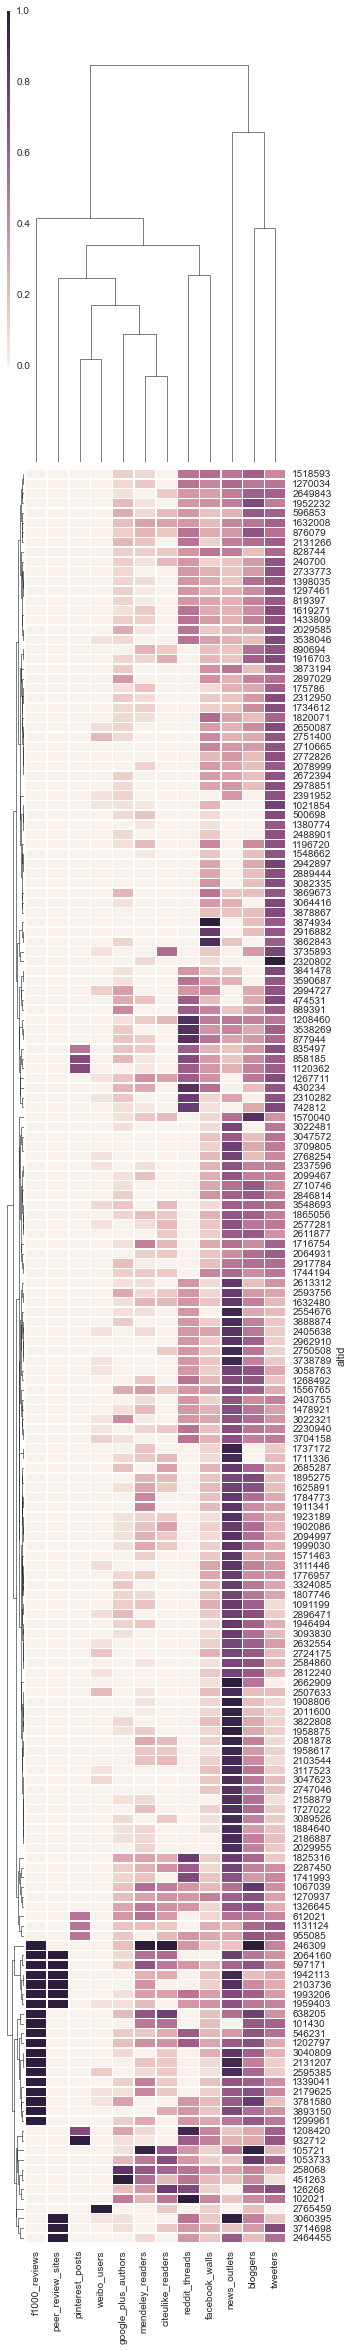

In [44]:
sqrt_df = attention_df.apply(numpy.sqrt)
seaborn.clustermap(data=sqrt_df, standard_scale=1, linewidths=0.01, figsize=(5, 40))